## KNN 참고 자료 : http://horae.tistory.com/entry/KNN-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-1

In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import mglearn

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
#data 확인
iris_dataset["feature_names"]
iris_dataset["target_names"]
iris_dataset["data"]
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# test / train 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( \
    iris_dataset["data"],iris_dataset["target"])

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
col = iris_dataset["feature_names"]
type(col)

(112, 4)
(112,)
(38, 4)
(38,)


list

In [6]:
df = pd.DataFrame(x_train,columns=col)

In [9]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c6d69b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fe67cc0>]], dtype=object)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
# model 평가
knn.predict(x_test)

array([2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0])

In [20]:
knn.score(x_test,y_test)

1.0

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [50]:
cancer.data
cancer.target.shape
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [41]:
print(X.shape)
print(y.shape)

(26, 2)
(26,)


In [55]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

In [57]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [58]:
knc.score(x_test,y_test)

0.91608391608391604

In [67]:
train_score =[]
test_score =[]
for n_neighbors in range(1,11):
    knc = KNeighborsClassifier(n_neighbors)
    knc.fit(x_train,y_train)
    train_score.append(knc.score(x_train,y_train))
    test_score.append(knc.score(x_test,y_test))
train_score
test_score

[0.92307692307692313,
 0.90909090909090906,
 0.91608391608391604,
 0.93006993006993011,
 0.94405594405594406,
 0.94405594405594406,
 0.94405594405594406,
 0.94405594405594406,
 0.94405594405594406,
 0.95104895104895104]

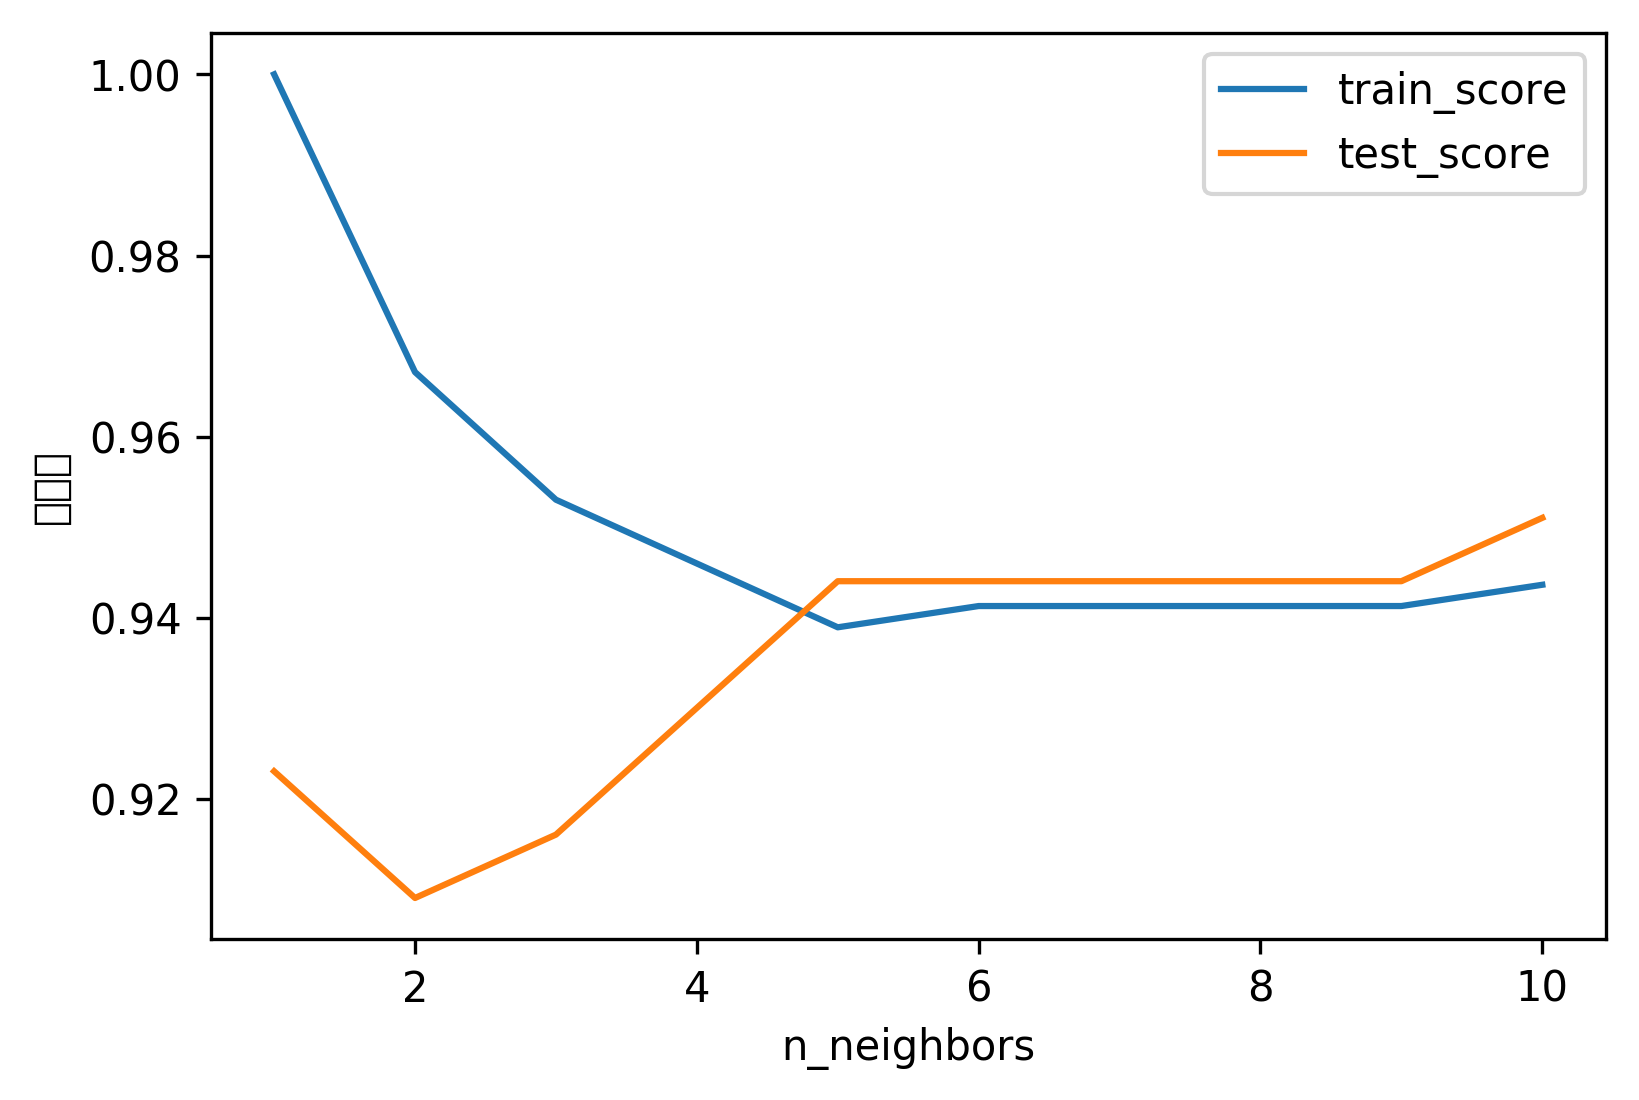

In [70]:
neighbors_settings = range(1, 11)
plt.plot(neighbors_settings, train_score, label="train_score")
plt.plot(neighbors_settings, test_score, label="test_score")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [74]:
from sklearn.linear_model import LinearRegression
x,y = mglearn.datasets.make_wave(n_samples=100)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [79]:
lr = LinearRegression().fit(x_train,y_train)

/Users/1002516/anaconda3/envs/deeplearning/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [82]:
lr.score(x_test,y_test)

0.69605660426341887

In [83]:
lr.coef_

array([ 0.41436945])

In [87]:
%timeit 3+4

18 ns ± 0.223 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [88]:
%%timeit
3*4

18.1 ns ± 0.13 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
